In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'errorbar.capsize': 2})

In [23]:
# Import all data from each text file
# Append data to a large dataframe
data=pd.DataFrame({'canal1t': [],'canal2t': [],'canal3t': [],'canal4t': [],'canal1q' : [],'canal2q' : [],'canal3q' : [],'canal4q' : [],'tiempo' : []})

# List to iterate files
i_files=np.arange(1,25)

# Iterate each file and append the data to the main data frame
for i in i_files:
    cfile='12HORAS_12HORASDatos_'+str(i)+'.txt'
    df_aux=pd.read_csv(cfile, engine='python',sep="\t", decimal=',',usecols=[0,1,2,3,4,5,6,7,8])
    df_aux.columns = ["canal1t", "canal2t","canal3t","canal4t","canal1q", "canal2q","canal3q","canal4q","tiempo"]
    
    data=data.append(df_aux,ignore_index=True)

//anaconda/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [24]:
print(len(data))
dataclean=data[(data.canal1t<4095.0)&(data.canal2t<4095.0)&(data.canal3t<4095.0)]
dataclean=data[(data.canal1q<4095.0)&(data.canal2q<4095.0)&(data.canal3q<4095.0)]
print(len(dataclean))
data=dataclean

6340
5779


In [25]:
data.head()

,canal1q,canal1t,canal2q,canal2t,canal3q,canal3t,canal4q,canal4t,tiempo
0,775.0,697.0,823.0,985.0,891.0,743.0,4.0,4095.0,6:42:19 p. m.
1,749.0,883.0,445.0,998.0,468.0,982.0,3.0,4095.0,6:42:24 p. m.
3,790.0,783.0,1425.0,1007.0,446.0,883.0,4.0,4095.0,6:42:25 p. m.
4,743.0,715.0,813.0,997.0,700.0,812.0,3.0,4095.0,6:42:28 p. m.
5,777.0,813.0,3154.0,1006.0,607.0,894.0,3.0,4095.0,6:42:30 p. m.


In [26]:
data.tail()

,canal1q,canal1t,canal2q,canal2t,canal3q,canal3t,canal4q,canal4t,tiempo
6335,846.0,816.0,204.0,962.0,150.0,998.0,2.0,4095.0,6:41:38 a. m.
6336,357.0,891.0,2004.0,995.0,867.0,846.0,5.0,4095.0,6:41:56 a. m.
6337,586.0,735.0,1310.0,997.0,571.0,832.0,2.0,4095.0,6:41:59 a. m.
6338,1698.0,680.0,1145.0,990.0,1573.0,745.0,8.0,4095.0,6:42:07 a. m.
6339,622.0,783.0,1013.0,1011.0,158.0,903.0,2.0,4095.0,6:42:09 a. m.


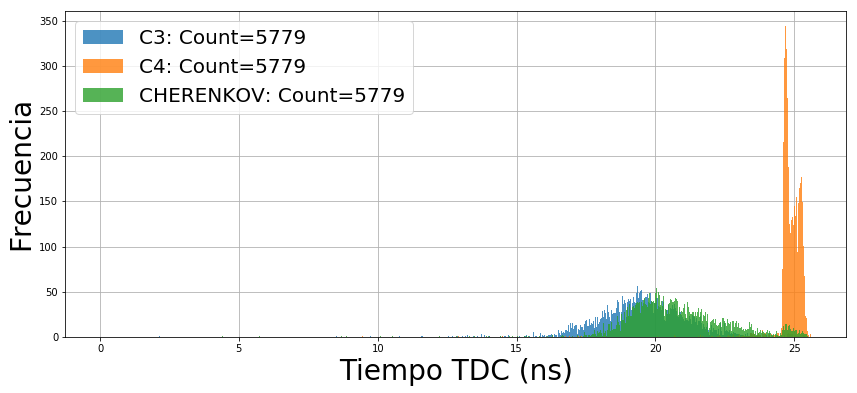

In [27]:
plt.figure(figsize=(14,6))
binwidth=1*0.025

nx,bx,px=plt.hist(data['canal1t']*0.025,alpha=0.8,label='C3: Count='+str(len(data)),bins=np.arange(min(data['canal1t']*0.025), max(data['canal1t']*0.025) + binwidth, binwidth))
nx,bx,px=plt.hist(data['canal2t']*0.025,alpha=0.8,label='C4: Count='+str(len(data)),bins=np.arange(min(data['canal2t']*0.025), max(data['canal2t']*0.025) + binwidth, binwidth))
nx,bx,px=plt.hist(data['canal3t']*0.025,alpha=0.8,label='CHERENKOV: Count='+str(len(data)),bins=np.arange(min(data['canal3t']*0.025), max(data['canal3t']*0.025) + binwidth, binwidth))


plt.ylabel('Frecuencia',fontsize=28)
plt.xlabel(r'Tiempo TDC (ns)',fontsize=28)

plt.grid(zorder=3)
plt.rc('axes', axisbelow=True)
plt.legend(fontsize=20)
plt.show()
plt.close()

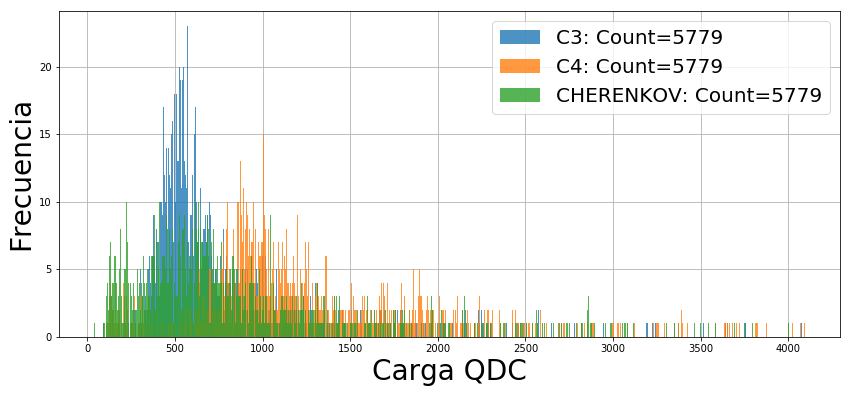

In [29]:
plt.figure(figsize=(14,6))
binwidth=1

nx,bx,px=plt.hist(data['canal1q'],alpha=0.8,label='C3: Count='+str(len(data)),bins=np.arange(min(data['canal1q']), max(data['canal1q']) + binwidth, binwidth))
nx,bx,px=plt.hist(data['canal2q'],alpha=0.8,label='C4: Count='+str(len(data)),bins=np.arange(min(data['canal2q']), max(data['canal2q']) + binwidth, binwidth))
nx,bx,px=plt.hist(data['canal3q'],alpha=0.8,label='CHERENKOV: Count='+str(len(data)),bins=np.arange(min(data['canal3q']), max(data['canal3q']) + binwidth, binwidth))


plt.ylabel('Frecuencia',fontsize=28)
plt.xlabel(r'Carga QDC',fontsize=28)

plt.grid(zorder=3)
plt.rc('axes', axisbelow=True)
plt.legend(fontsize=20)
plt.show()
plt.close()

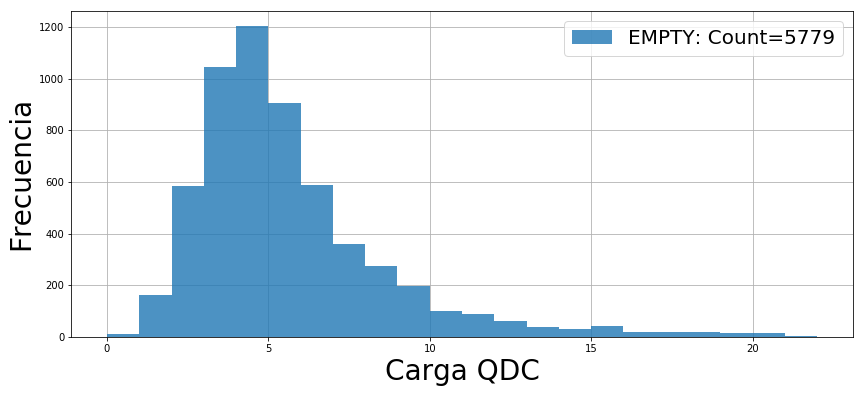

In [34]:
plt.figure(figsize=(14,6))
binwidth=1

nx,bx,px=plt.hist(data['canal4q'],alpha=0.8,label='EMPTY: Count='+str(len(data)),bins=np.arange(min(data['canal4q']), max(data['canal4q']) + binwidth, binwidth))

plt.ylabel('Frecuencia',fontsize=28)
plt.xlabel(r'Carga QDC',fontsize=28)

plt.grid(zorder=3)
plt.rc('axes', axisbelow=True)
plt.legend(fontsize=20)
plt.show()
plt.close()

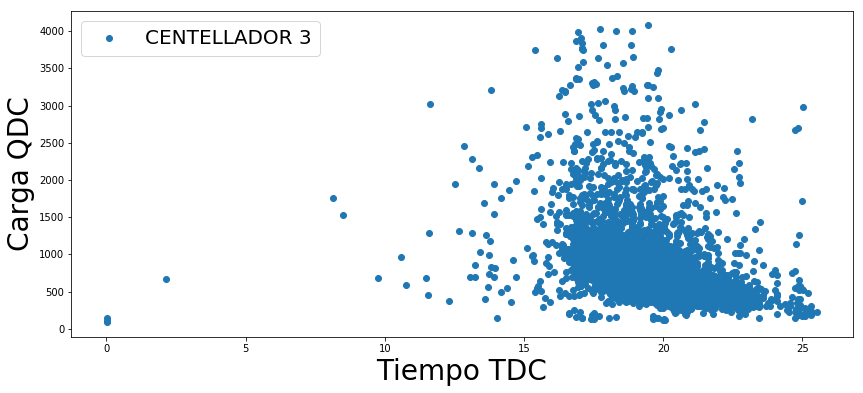

In [31]:
plt.figure(figsize=(14,6))

plt.scatter(data['canal1t']*0.025,data['canal1q'],label='CENTELLADOR 3')

plt.xlabel(r'Tiempo TDC',fontsize=28)
plt.ylabel(r'Carga QDC',fontsize=28)

plt.legend(fontsize=20)
plt.show()
plt.close()

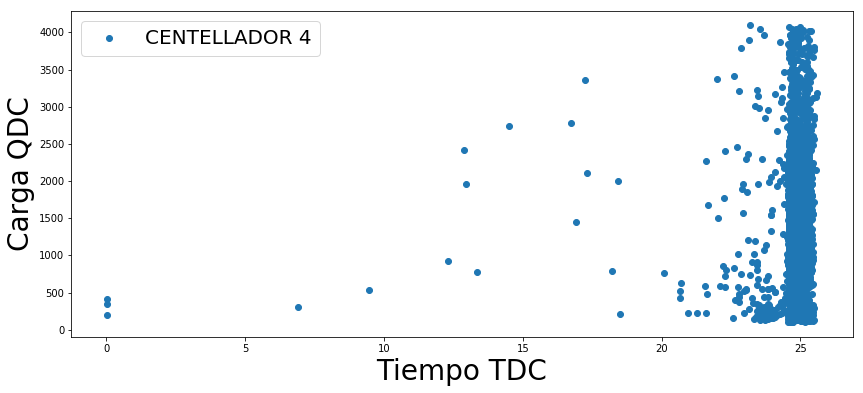

In [32]:
plt.figure(figsize=(14,6))

plt.scatter(data['canal2t']*0.025,data['canal2q'],label='CENTELLADOR 4')

plt.xlabel(r'Tiempo TDC',fontsize=28)
plt.ylabel(r'Carga QDC',fontsize=28)

plt.legend(fontsize=20)
plt.show()
plt.close()

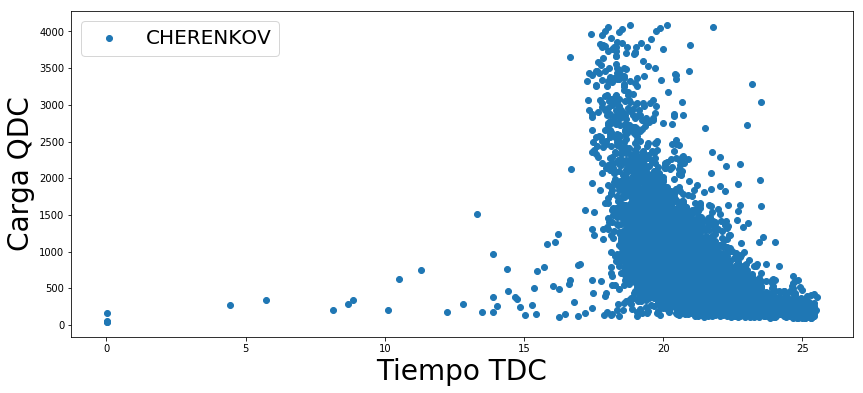

In [33]:
plt.figure(figsize=(14,6))

plt.scatter(data['canal3t']*0.025,data['canal3q'],label='CHERENKOV')

plt.xlabel(r'Tiempo TDC',fontsize=28)
plt.ylabel(r'Carga QDC',fontsize=28)

plt.legend(fontsize=20)
plt.show()
plt.close()